HW1: Q2:

In [131]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2-2-1: import data:

In [132]:
# loading the dataset:
    # define directory:
relative_path=  "database"
database_name = "ConcreteStrengthData.csv"
base_dir = os.getcwd()
dataset_path = os.path.join(base_dir, relative_path, database_name)

df=pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [133]:
n = 3
df.head(n)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [134]:
# pre processing the data:
df = df.drop_duplicates() # remove duplicate
print(df.columns.tolist()) 
df.columns = df.columns.str.strip()  # there is a space after some columns' name, so i add this to solve the problem

['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays', 'Strength']


2-2-2: statistical eval. :

In [135]:
pd.set_option('display.precision', 3)
print("mean:")
print(df.mean())
print("***********************************")
print("Max:")
print(df.max())


mean:
CementComponent              278.631
BlastFurnaceSlag              72.043
FlyAshComponent               55.536
WaterComponent               182.075
SuperplasticizerComponent      6.033
CoarseAggregateComponent     974.377
FineAggregateComponent       772.688
AgeInDays                     45.857
Strength                      35.250
dtype: float64
***********************************
Max:
CementComponent               540.0
BlastFurnaceSlag              359.4
FlyAshComponent               200.1
WaterComponent                247.0
SuperplasticizerComponent      32.2
CoarseAggregateComponent     1145.0
FineAggregateComponent        992.6
AgeInDays                     365.0
Strength                       82.6
dtype: float64


In [136]:
print("Min:")
print(df.min())
print("***********************************")
print("standrad diviation:")
print(df.std())

Min:
CementComponent              102.00
BlastFurnaceSlag               0.00
FlyAshComponent                0.00
WaterComponent               121.80
SuperplasticizerComponent      0.00
CoarseAggregateComponent     801.00
FineAggregateComponent       594.00
AgeInDays                      1.00
Strength                       2.33
dtype: float64
***********************************
standrad diviation:
CementComponent              104.344
BlastFurnaceSlag              86.171
FlyAshComponent               64.208
WaterComponent                21.339
SuperplasticizerComponent      5.920
CoarseAggregateComponent      77.580
FineAggregateComponent        80.340
AgeInDays                     63.735
Strength                      16.285
dtype: float64


In [137]:
# or can use:

df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000
mean,278.631,72.043,55.536,182.075,6.033,974.377,772.688,45.857,35.250
std,104.344,86.171,64.208,21.339,5.920,77.580,80.340,63.735,16.285
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,190.700,0.000,0.000,166.600,0.000,932.000,724.300,7.000,23.520
50%,265.000,20.000,0.000,185.700,6.100,968.000,780.000,28.000,33.800
75%,349.000,142.500,118.300,192.900,10.000,1031.000,822.200,56.000,44.870
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


histogram:

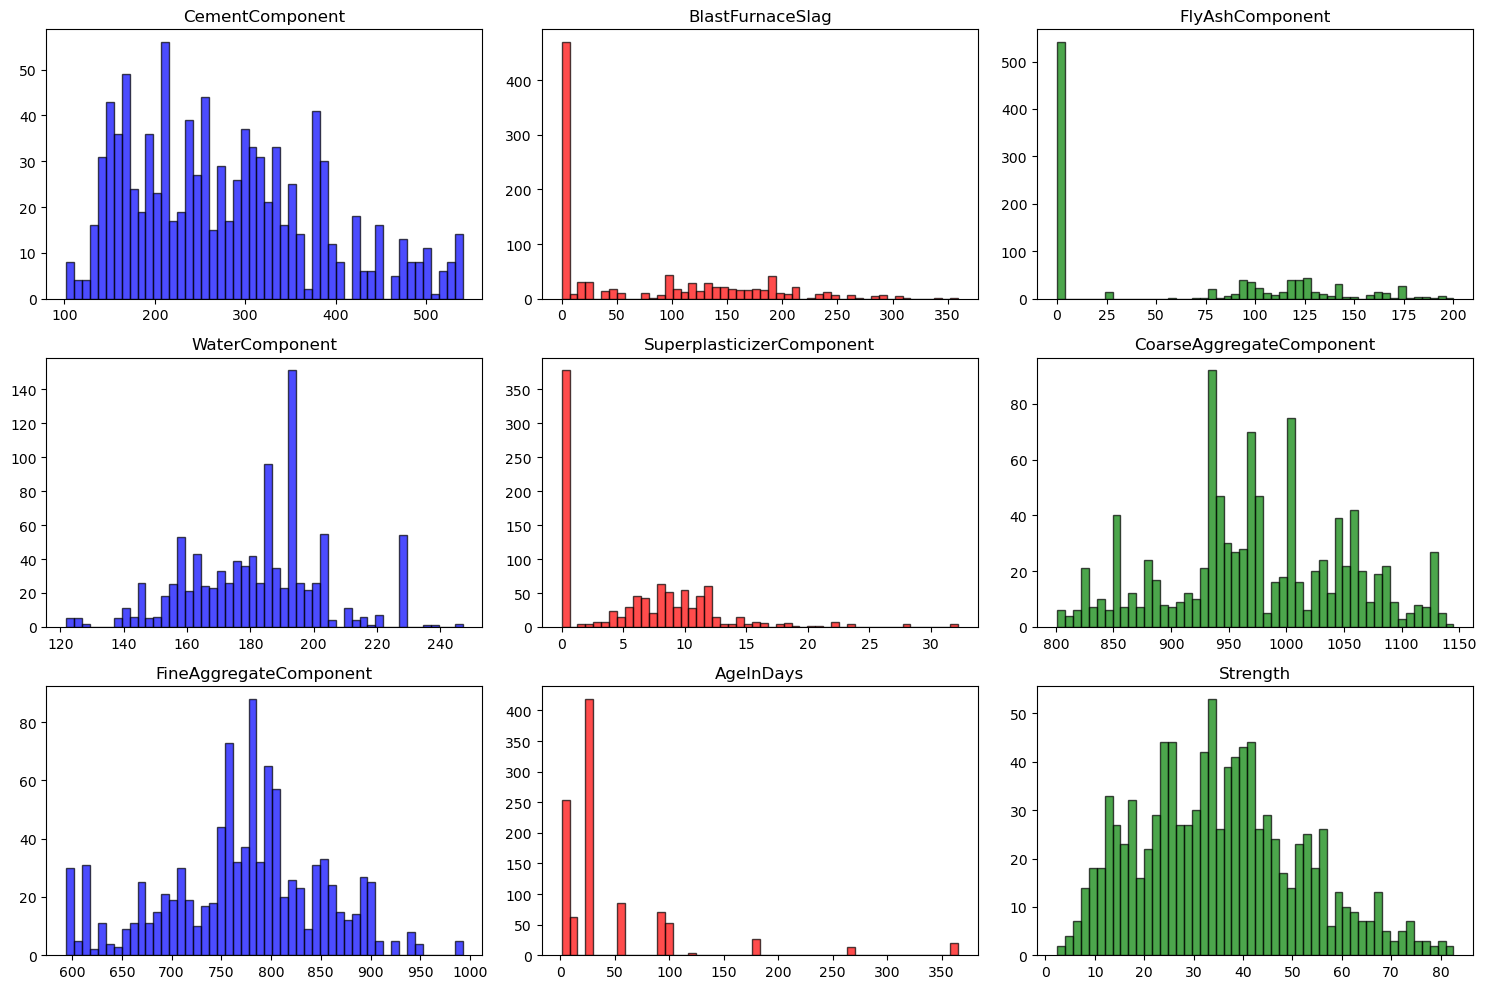

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = df.drop_duplicates()
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axs = axs.flatten()
colorr = ["blue", "red", "green", "blue", "red", "green", "blue", "red", "green"]

for index, column in enumerate(df.columns):
    axs[index].hist(df[column], bins=50, color=colorr[index], alpha=0.7, edgecolor='black')
    axs[index].set_title(column)

plt.tight_layout()


2-2-3:correlation with Strength

In [139]:
correlation_matrix= df.corr()['Strength'].sort_values(ascending=False)
correlation_matrix

Strength                     1.000
CementComponent              0.488
SuperplasticizerComponent    0.344
AgeInDays                    0.337
BlastFurnaceSlag             0.103
FlyAshComponent             -0.081
CoarseAggregateComponent    -0.145
FineAggregateComponent      -0.186
WaterComponent              -0.270
Name: Strength, dtype: float64

correlation matrix:

<Figure size 2000x1500 with 0 Axes>

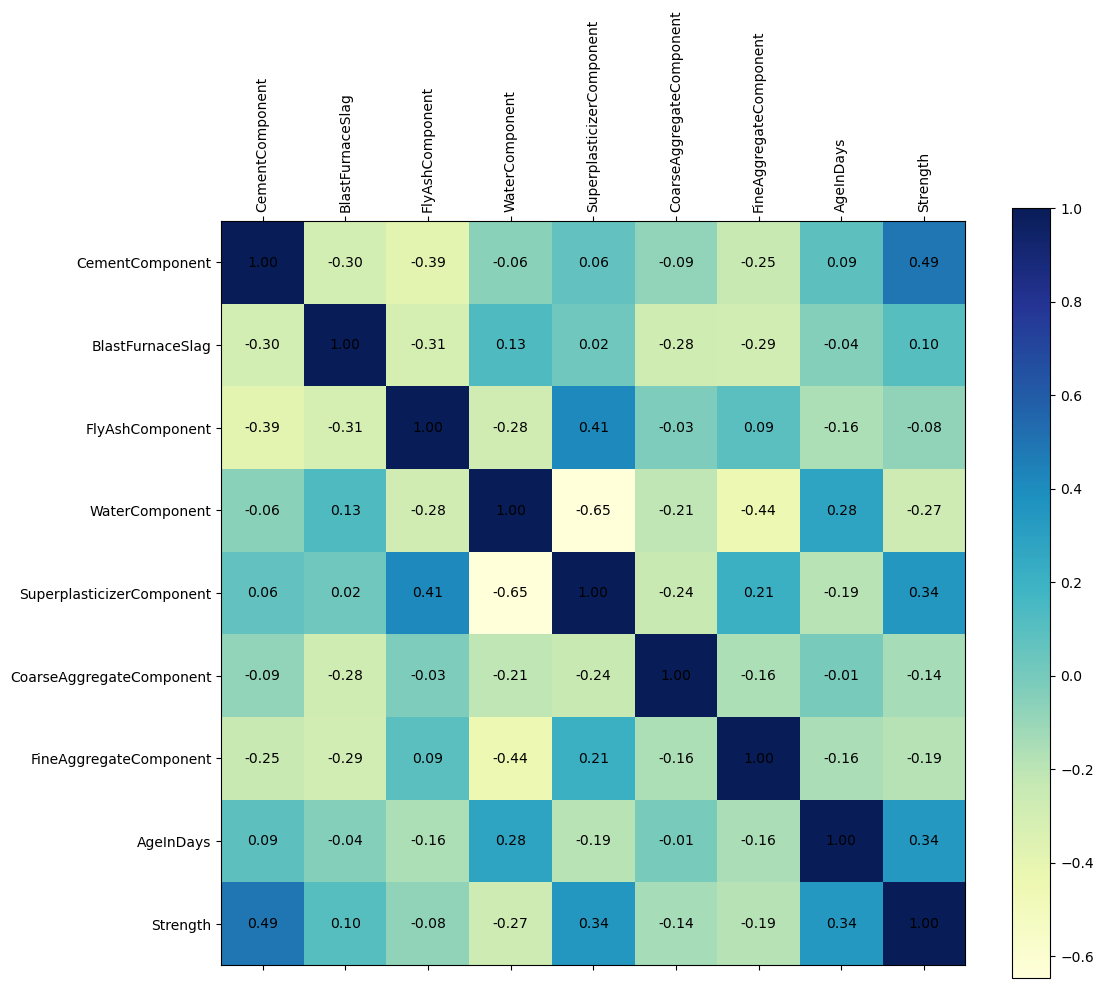

In [140]:
# Correlation plot
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
correlation_matrix['Strength'].sort_values(ascending=False)

# Creating a heatmap manually
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(correlation_matrix, cmap="YlGnBu")
plt.colorbar(cax)

ax.set_xticks(range(len(df.columns)))
ax.set_yticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

Scatter plot:

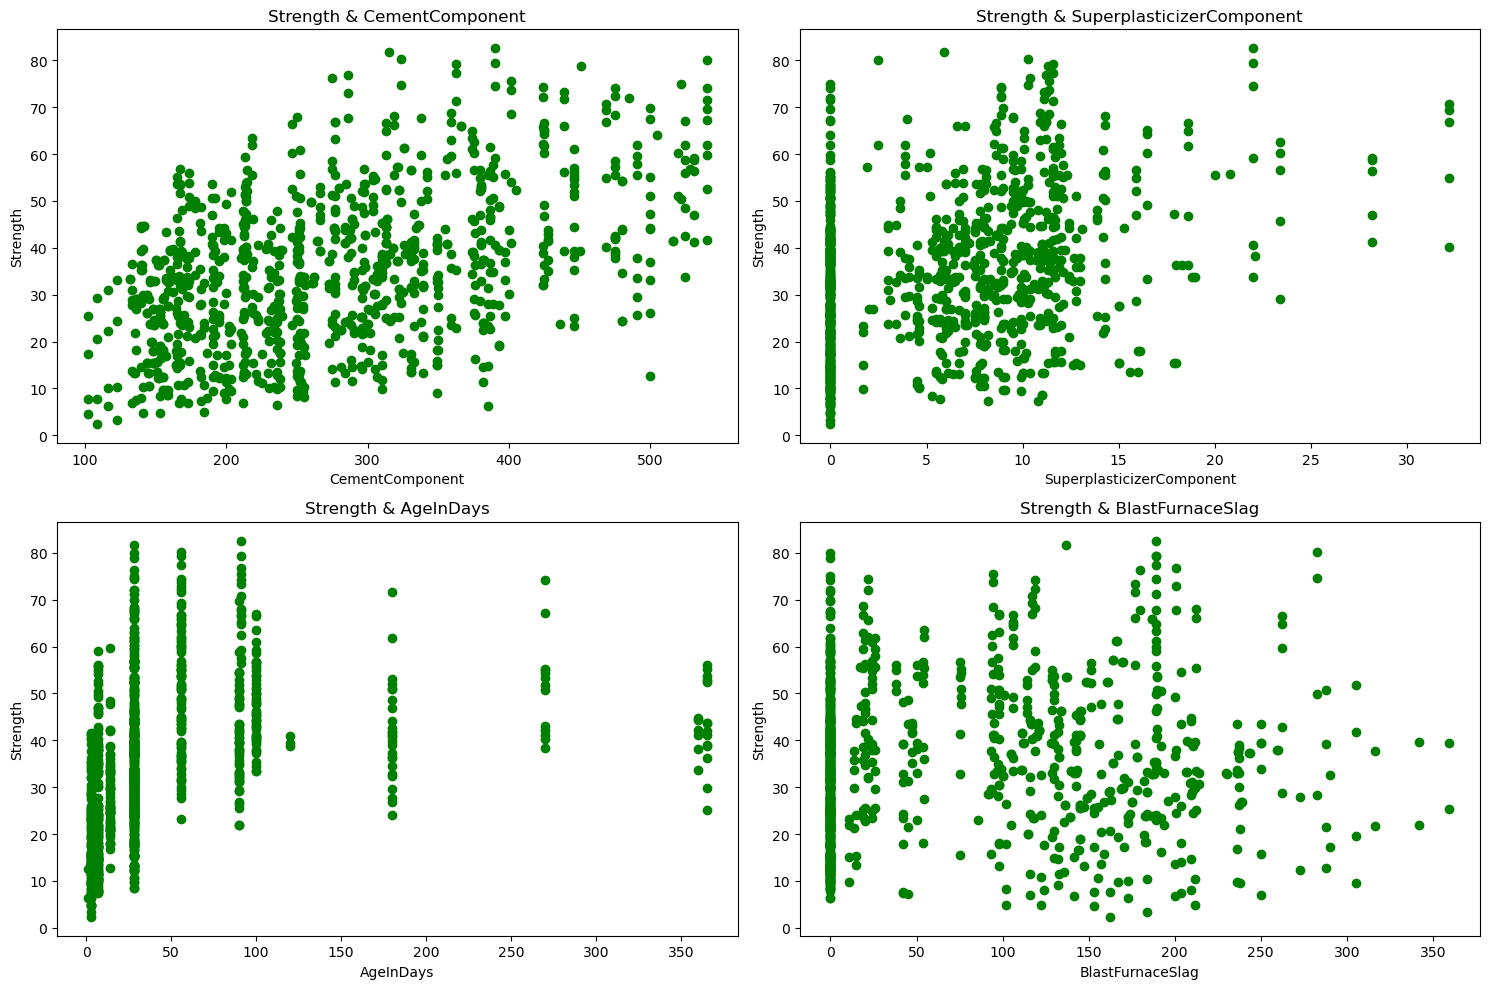

In [141]:
key_features = ["CementComponent", "SuperplasticizerComponent", "AgeInDays", "BlastFurnaceSlag"]

plt.figure(figsize=(15,10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(x= df[feature], y= df["Strength"], color='green')
    plt.xlabel(feature)
    plt.ylabel("Strength")
    plt.title(f"Strength & {feature}")

plt.tight_layout()
plt.show()



features with high correlations:

In [142]:
features= (df.columns)

In [143]:
for i , feature in enumerate(features):
    correlation_matrix= df.corr()[f'{feature}'].sort_values(ascending=False)
    print(f"correlation for featuer: {feature}")
    print(correlation_matrix)
    print("##################################3333")

    

correlation for featuer: CementComponent
CementComponent              1.000
Strength                     0.488
AgeInDays                    0.086
SuperplasticizerComponent    0.061
WaterComponent              -0.057
CoarseAggregateComponent    -0.086
FineAggregateComponent      -0.245
BlastFurnaceSlag            -0.303
FlyAshComponent             -0.386
Name: CementComponent, dtype: float64
##################################3333
correlation for featuer: BlastFurnaceSlag
BlastFurnaceSlag             1.000
WaterComponent               0.130
Strength                     0.103
SuperplasticizerComponent    0.020
AgeInDays                   -0.043
CoarseAggregateComponent    -0.278
FineAggregateComponent      -0.290
CementComponent             -0.303
FlyAshComponent             -0.312
Name: BlastFurnaceSlag, dtype: float64
##################################3333
correlation for featuer: FlyAshComponent
FlyAshComponent              1.000
SuperplasticizerComponent    0.414
FineAggregateComponen

important result of above cell: for the most correlation:

FlyAshComponent       and SuperplasticizerComponent  has a correlation of   0.414 which is not that much to consider

3-2: MLP: data:


In [144]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
# comment/uncomment for each option:
# scaler= StandardScaler()
scaler= MinMaxScaler(feature_range=(-1,1))

x=df.drop(columns=['Strength']).values
y=df['Strength'].values
y=y.reshape(-1, 1) # to input the sclaer

x_scaled= scaler.fit_transform(x)
y_scaled= scaler.fit_transform(y)

test_train_portion  = 0.2
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=test_train_portion, random_state=42) 


3-2: MLP: define models:

In [145]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout
from keras.regularizers import l2

row, columns = np.shape(x_scaled)

hidden_layer_neurons1 = 16
hidden_layer_neurons2 = 32

model1= Sequential([ 
    Input(shape=(columns,)),
    Dense(hidden_layer_neurons1, activation='relu'),
    Dense(1, activation='linear')
])


model2= Sequential([ 
    Input(shape=(columns,)),
    Dense(hidden_layer_neurons2, activation='relu'),
    Dense(1, activation='linear')
])

3-2: MLP: traing:

In [146]:
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy','mse'])
history1=model1.fit(x_train, y_train, epochs=50,validation_split=0.3)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.4710 - mse: 0.4710 - val_accuracy: 0.0000e+00 - val_loss: 0.3507 - val_mse: 0.3507
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3129 - mse: 0.3129 - val_accuracy: 0.0000e+00 - val_loss: 0.2840 - val_mse: 0.2840
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2696 - mse: 0.2696 - val_accuracy: 0.0000e+00 - val_loss: 0.2387 - val_mse: 0.2387
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2380 - mse: 0.2380 - val_accuracy: 0.0000e+00 - val_loss: 0.2072 - val_mse: 0.2072
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2066 - mse: 0.2066 - val_accuracy: 0.0000e+00 - val_loss: 0.1810 - val_mse: 0.1810
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1673 - mse: 0.1673 - val_accuracy: 0.0000e+00 - val_loss: 0.1634 - val_mse: 0.1634
Epoc

In [147]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy','mse'])
history2=model2.fit(x_train, y_train, epochs=50,validation_split=0.3)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.2121 - mse: 0.2121 - val_accuracy: 0.0000e+00 - val_loss: 0.1346 - val_mse: 0.1346
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1441 - mse: 0.1441 - val_accuracy: 0.0000e+00 - val_loss: 0.1145 - val_mse: 0.1145
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1213 - mse: 0.1213 - val_accuracy: 0.0000e+00 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0897 - mse: 0.0897 - val_accuracy: 0.0000e+00 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0852 - mse: 0.0852 - val_accuracy: 0.0000e+00 - val_loss: 0.0849 - val_mse: 0.0849
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0716 - mse: 0.0716 - val_accuracy: 0.0000e+00 - val_loss: 0.0806 - val_mse: 0.0806
Epoc

Show MAE and MSE for models:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE for model 1: 0.04635656252503395
MAE for model 1: 0.16230428218841553
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for model 2: 0.004975124262273312
MAE for model 2: 0.14140953123569489


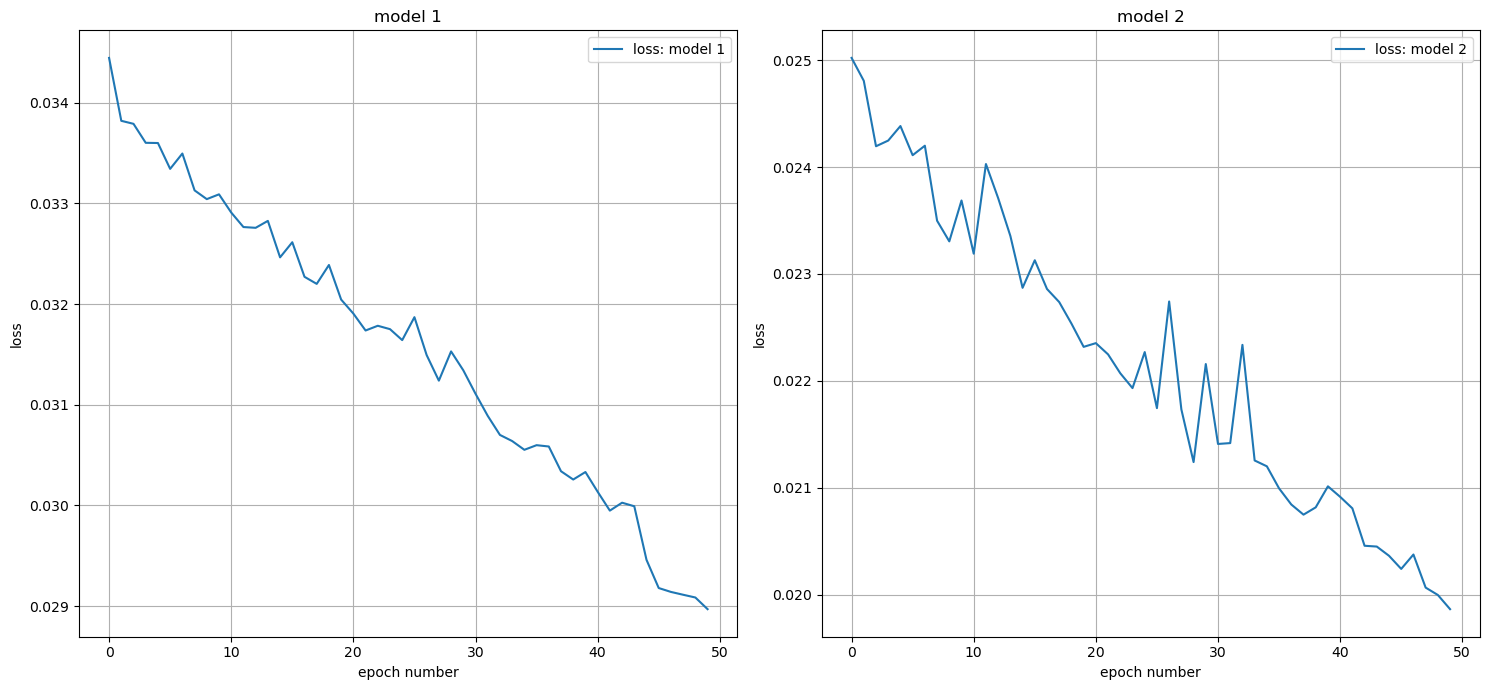

In [ ]:
from tensorflow.keras.losses import MeanAbsoluteError
models=[model1, model2]
histories=[history1,history2]
fig, axes= plt.subplots(1, 2, figsize=(15,  7)) 
axes = axes.flat

for i , model in enumerate(models):
    loss ,acc ,mse =model.evaluate(x_test, y_test, verbose=0)

    y_pred = model.predict(x_test)
    mae = MeanAbsoluteError(y_test, y_pred).numpy()

    print(f"MSE for model {i+1}: {mse}")
    print(f"MAE for model {i+1}: {mae}")

    train_loss= histories[i].history['loss']
    axes[i].plot(train_loss, label=f'loss: model {i+1}')

    axes[i].set_title(f'model {i+1}')
    axes[i].set_xlabel('epoch number')
    axes[i].set_ylabel('loss')
    axes[i].legend()
    axes[i].grid(True)



plt.tight_layout()
plt.show()


according to the loss, MAE and MSE, model 2 with 32 neurons is better

4-2-1: epochs

In [148]:
epochs=[20,50,100]
hidden_layer_neurons = 32
for i , epoch_ in enumerate(epochs):
 
    model= Sequential([ 
        Input(shape=(columns,)),
        Dense(hidden_layer_neurons, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    history=model.fit(x_train, y_train, epochs=epoch_,validation_split=0.3, verbose=0)


    loss , mse =model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    mae = MeanAbsoluteError()(y_test, y_pred).numpy()

    print(f"MSE for epoch = {epoch_}: {mse}")
    print(f"MAE for epoch = {epoch_}:: {mae}")
    print("#######################################")


    

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for epoch = 20: 0.07153603434562683
MAE for epoch = 20:: 0.20982345938682556
#######################################
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for epoch = 50: 0.08593492209911346
MAE for epoch = 50:: 0.23356246948242188
#######################################
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for epoch = 100: 0.040952615439891815
MAE for epoch = 100:: 0.14765091240406036
#######################################


4-2-2: cost functions:

In [149]:
loss_functions=['mean_squared_error', 'mean_absolute_error', 'huber']
hidden_layer_neurons = 32
for i , loss_ in enumerate(loss_functions):
 
    model= Sequential([ 
        Input(shape=(columns,)),
        Dense(hidden_layer_neurons, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss=loss_, metrics=['mse'])
    history=model.fit(x_train, y_train, epochs=50,validation_split=0.3, verbose=0)


    loss , mse =model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    mae = MeanAbsoluteError()(y_test, y_pred).numpy()

    print(f"MSE for loss = {loss_}: {mse}")
    print(f"MAE for loss = {loss_}:: {mae}")
    print("#######################################")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for loss = mean_squared_error: 0.04916786029934883
MAE for loss = mean_squared_error:: 0.1663588136434555
#######################################
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for loss = mean_absolute_error: 0.06835457682609558
MAE for loss = mean_absolute_error:: 0.19115543365478516
#######################################
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for loss = huber: 0.05809878930449486
MAE for loss = huber:: 0.18207737803459167
#######################################


4-2-3: optimizer:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for optimizer = adam: 0.05902443081140518
MAE for optimizer = adam: 0.18322505056858063
#######################################
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE for optimizer = sgd: 0.08686435967683792
MAE for optimizer = sgd: 0.23233509063720703
#######################################
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MSE for optimizer = rmsprop: 0.053732991218566895
MAE for optimizer = rmsprop: 0.17295971512794495
#######################################


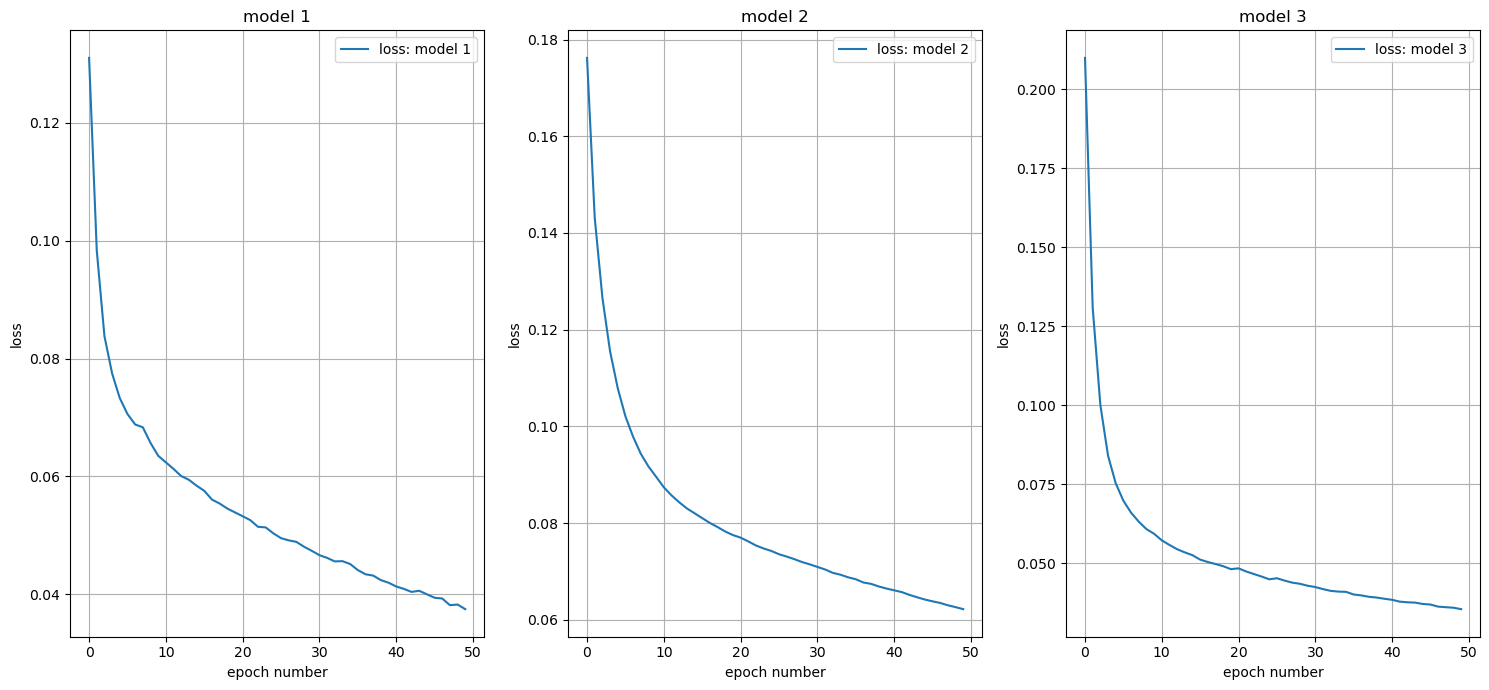

In [155]:
optimizers=['adam', 'sgd', 'rmsprop']
hidden_layer_neurons = 32


fig, axes= plt.subplots(1, 3, figsize=(15,  7)) 
axes = axes.flat

for i , optimizer_ in enumerate(optimizers):
 
    model= Sequential([ 
        Input(shape=(columns,)),
        Dense(hidden_layer_neurons, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer_, loss='mean_squared_error', metrics=['mse'])
    history=model.fit(x_train, y_train, epochs=50,validation_split=0.3, verbose=0)

    
    loss , mse =model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    mae = MeanAbsoluteError()(y_test, y_pred).numpy()

    print(f"MSE for optimizer = {optimizer_}: {mse}")
    print(f"MAE for optimizer = {optimizer_}: {mae}")
    print("#######################################")

    loss ,mse =model.evaluate(x_test, y_test, verbose=0)

    train_loss= history.history['loss']
    axes[i].plot(train_loss, label=f'loss: model {i+1}')

    axes[i].set_title(f'model {i+1}')
    axes[i].set_xlabel('epoch number')
    axes[i].set_ylabel('loss')
    axes[i].legend()
    axes[i].grid(True)



plt.tight_layout()
plt.show()